In [3]:
!pip install opencv-contrib-python==3.4.2.17

     |████████████████████████████████| 30.6 MB 1.4 MB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


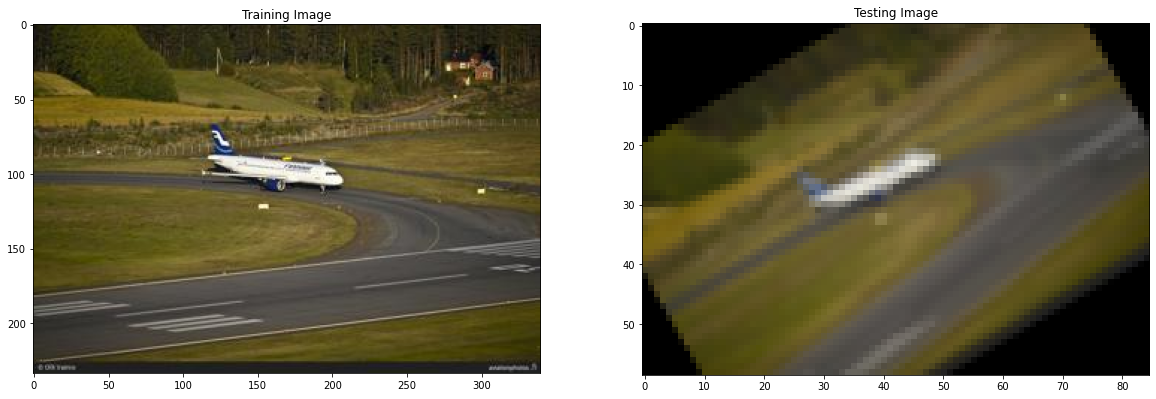

In [6]:
# https://github.com/deepanshut041/feature-detection/blob/master/surf/surf.ipynb 

import cv2
import matplotlib.pyplot as plt
import numpy as np
import time
%matplotlib inline

# Load the image
image1 = cv2.imread('./data/0002.jpg')

# Convert the training image to RGB
training_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Convert the training image to gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)

# Create test image by adding Scale Invariance and Rotational Invariance
test_image = cv2.pyrDown(training_image)
test_image = cv2.pyrDown(test_image)
num_rows, num_cols = test_image.shape[:2]

rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))

test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

# Display traning image and testing image
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Training Image")
plots[0].imshow(training_image)

plots[1].set_title("Testing Image")
plots[1].imshow(test_image)

# SIFT Detect keypoints and Create Descriptor

Time taken by model =  0.0433199405670166
Number of Keypoints Detected In The Training Image:  242
Number of Keypoints Detected In The Query Image:  14


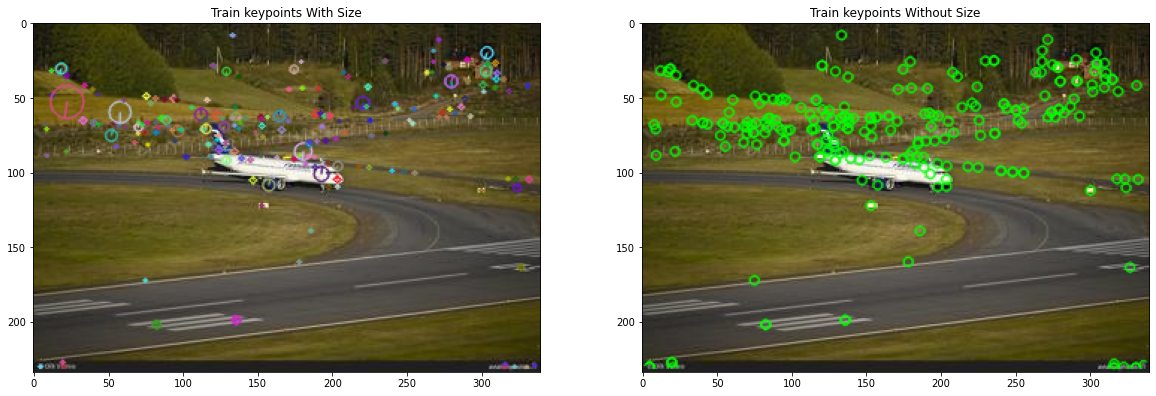

In [9]:
t_sift_s = time.time()
sift = cv2.xfeatures2d.SIFT_create(800)
sift_train_keypoints, sift_train_descriptor = sift.detectAndCompute(training_gray, None)
sift_test_keypoints, sift_test_descriptor = sift.detectAndCompute(test_gray, None)
t_sift_e = time.time()

sift_time = t_sift_e - t_sift_s

print("Time taken by model = ", sift_time)

keypoints_without_size = np.copy(training_image)
keypoints_with_size = np.copy(training_image)

cv2.drawKeypoints(training_image, sift_train_keypoints, keypoints_without_size, color = (0, 255, 0))

cv2.drawKeypoints(training_image, sift_train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(sift_train_keypoints))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(sift_test_keypoints))

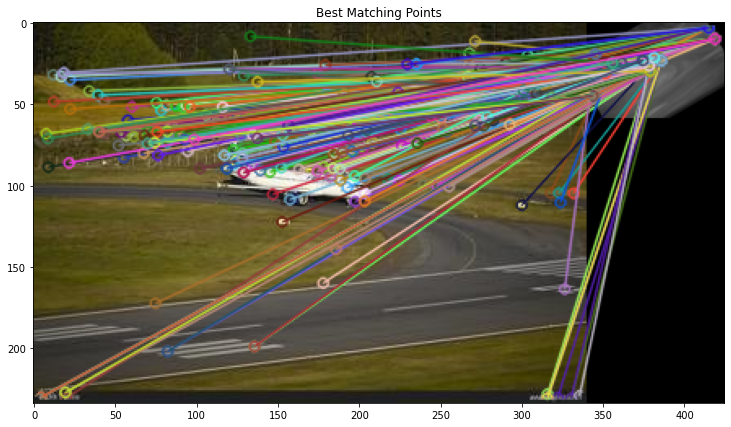


Number of Matching Keypoints Between The Training and Query Images:  242


In [10]:
# Create a Brute Force Matcher object.
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck = False)

# Perform the matching between the SURF descriptors of the training image and the test image
matches = bf.match(sift_train_descriptor, sift_test_descriptor)

# The matches with shorter distance are the ones we want.
matches = sorted(matches, key = lambda x : x.distance)

result = cv2.drawMatches(training_image, sift_train_keypoints, test_gray, sift_test_keypoints, matches, test_gray, flags = 2)

# Display the best matching points
plt.rcParams['figure.figsize'] = [14.0, 7.0]
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

# Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))

# SURF Detect keypoints and Create Descriptor

Time taken by model =  0.02640080451965332
Number of Keypoints Detected In The Training Image:  92
Number of Keypoints Detected In The Query Image:  4


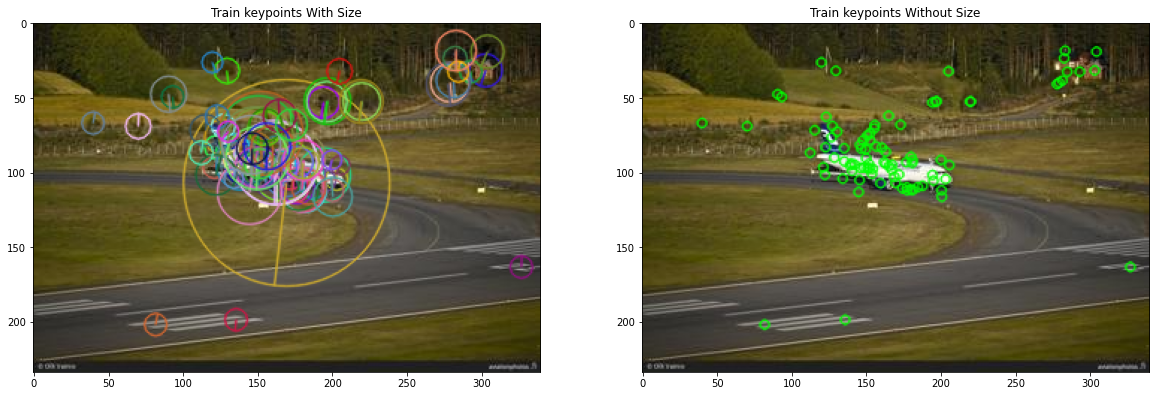

In [13]:
t_surf_s = time.time()
surf = cv2.xfeatures2d.SURF_create(800)
surf_train_keypoints, surf_train_descriptor = surf.detectAndCompute(training_gray, None)
surf_test_keypoints, surf_test_descriptor = surf.detectAndCompute(test_gray, None)
t_surf_e = time.time()

surf_time = t_surf_e - t_surf_s

print("Time taken by model = ", surf_time)

keypoints_without_size = np.copy(training_image)
keypoints_with_size = np.copy(training_image)

cv2.drawKeypoints(training_image, surf_train_keypoints, keypoints_without_size, color = (0, 255, 0))

cv2.drawKeypoints(training_image, surf_train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(surf_train_keypoints))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(surf_test_keypoints))

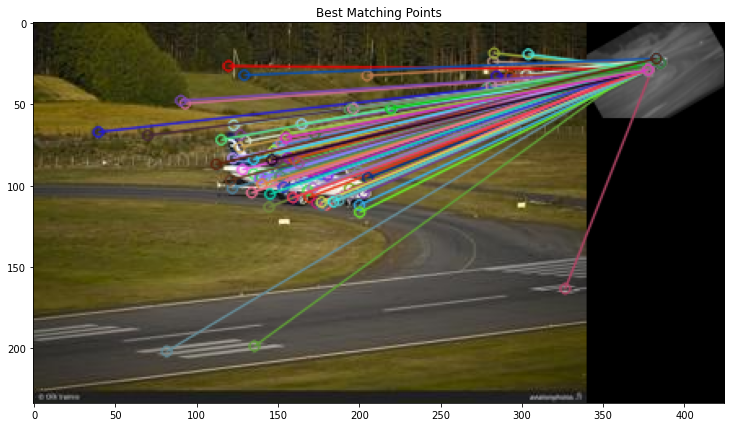


Number of Matching Keypoints Between The Training and Query Images:  92


In [14]:
# Create a Brute Force Matcher object.
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck = False)

# Perform the matching between the SURF descriptors of the training image and the test image
matches = bf.match(surf_train_descriptor, surf_test_descriptor)

# The matches with shorter distance are the ones we want.
matches = sorted(matches, key = lambda x : x.distance)

result = cv2.drawMatches(training_image, surf_train_keypoints, test_gray, surf_test_keypoints, matches, test_gray, flags = 2)

# Display the best matching points
plt.rcParams['figure.figsize'] = [14.0, 7.0]
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

# Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))